# Inheritance hierarchy of builtins that are types

SPDX-License-Identifier: 0BSD

In [1]:
import builtins
import collections
import os
from typing import Iterable
import urllib

from IPython.core.display import HTML
from graphviz import Digraph, Graph
from typeguard import typechecked

<h2 style="font-size: 1.2rem">
    Helpers for displaying graphs with accompanying GraphvizOnline links:
</h2>

In [2]:
@typechecked
def make_hyperlink(url: str, inner_html: str) -> HTML:
    """Make a hyperlink that opens a page in a new browser tab when clicked."""
    style = 'font-size: 1.3rem; background-color: #f6f6f9'
    tag_attributes = f'href="{url}" target="_blank" style="{style}"'
    return HTML(f'<a {tag_attributes}>{inner_html}</a>')

In [3]:
@typechecked
def make_graphvizonline_link(graph: Graph | Digraph) -> HTML:
    """Make a Jupyter/IPython link to open a graph in GraphvizOnline."""
    quoted = urllib.parse.quote(str(graph))
    url = f'https://dreampuf.github.io/GraphvizOnline/#{quoted}'
    return make_hyperlink(url, 'Open in GraphvizOnline')

In [4]:
@typechecked
def display_with_link(graph: Graph | Digraph) -> None:
    """Display a graph in Jupyter/IPython, with a GraphvizOnline link added."""
    display(graph)  # This may need an import, if extracted to a .py file.
    display(make_graphvizonline_link(graph))

In [5]:
# The font that class names will be written in, in rendered graphs.
NODE_LABEL_FONT = 'Segoe UI' if os.name == 'nt' else 'Helvetica'

<h2 style="font-size: 1.2rem">
    Finding the public builtins that are types and building their inheritance tree:
</h2>

In [6]:
@typechecked
def public_builtin_types() -> Iterable[type]:
    """Yield types in the builtins module that are intended for direct use."""
    names = (name for name in dir(builtins) if not name.startswith('_'))
    members = (getattr(builtins, name) for name in names)
    return (member for member in members if isinstance(member, type))

In [7]:
@typechecked
def build_graph() -> Digraph:
    """Build an inheritance-hierarchy graph of builtins that are types."""
    graph = Digraph()
    visited = set()
    queue = collections.deque()
    
    @typechecked
    def visit(node: type, **kwargs: str) -> None:
        if node not in visited:
            visited.add(node)
            queue.append(node)
            graph.node(node.__name__, fontname=NODE_LABEL_FONT, **kwargs)
        
    for class_ in public_builtin_types():
        visit(class_)

    while queue:
        child = queue.popleft()
        for parent in child.__bases__:
            # If this ancestor is not a built-in, give it a gray background.
            visit(parent, fillcolor='lightgray', style='filled')
                
            graph.edge(parent.__name__, child.__name__)
    
    return graph

In [8]:
graph = build_graph()

<h2 style="font-size: 1.2rem">
    Inheritance hierarchy drawing (levels preserved, thus very wide):
</h2>

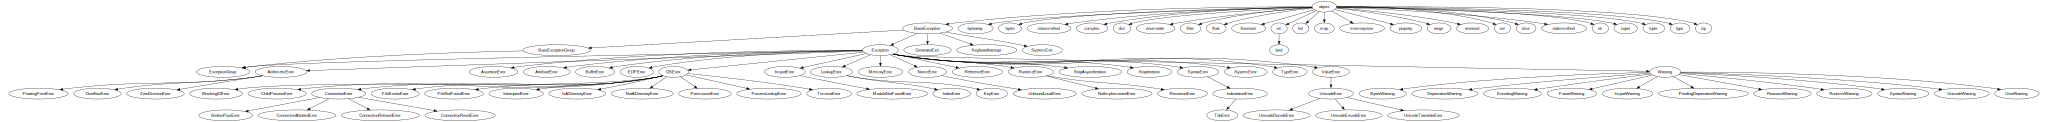

In [9]:
graph.graph_attr['size'] = '58'
display_with_link(graph)

<h2 style="font-size: 1.2rem">
    Inheritance hierarchy drawing (staggered for viewing ease):
</h2>

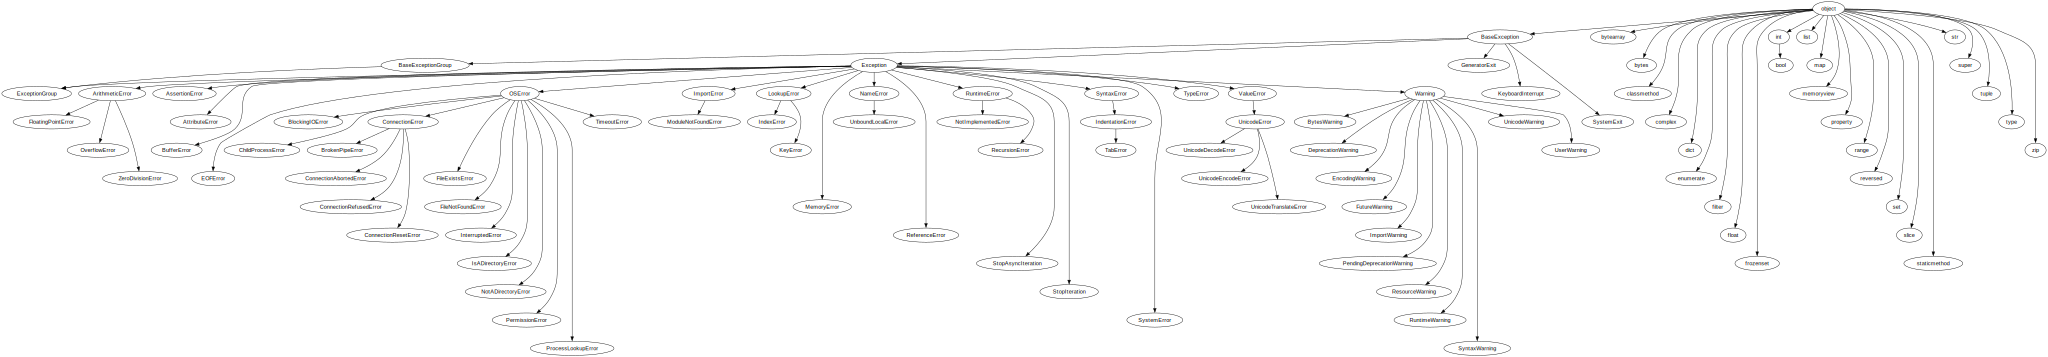

In [10]:
graph.graph_attr['size'] = '48'
display_with_link(graph.unflatten(stagger=9))

<h2 style="font-size: 1.2rem">
    Inheritance hierarchy drawing (as above, but smaller):
</h2>

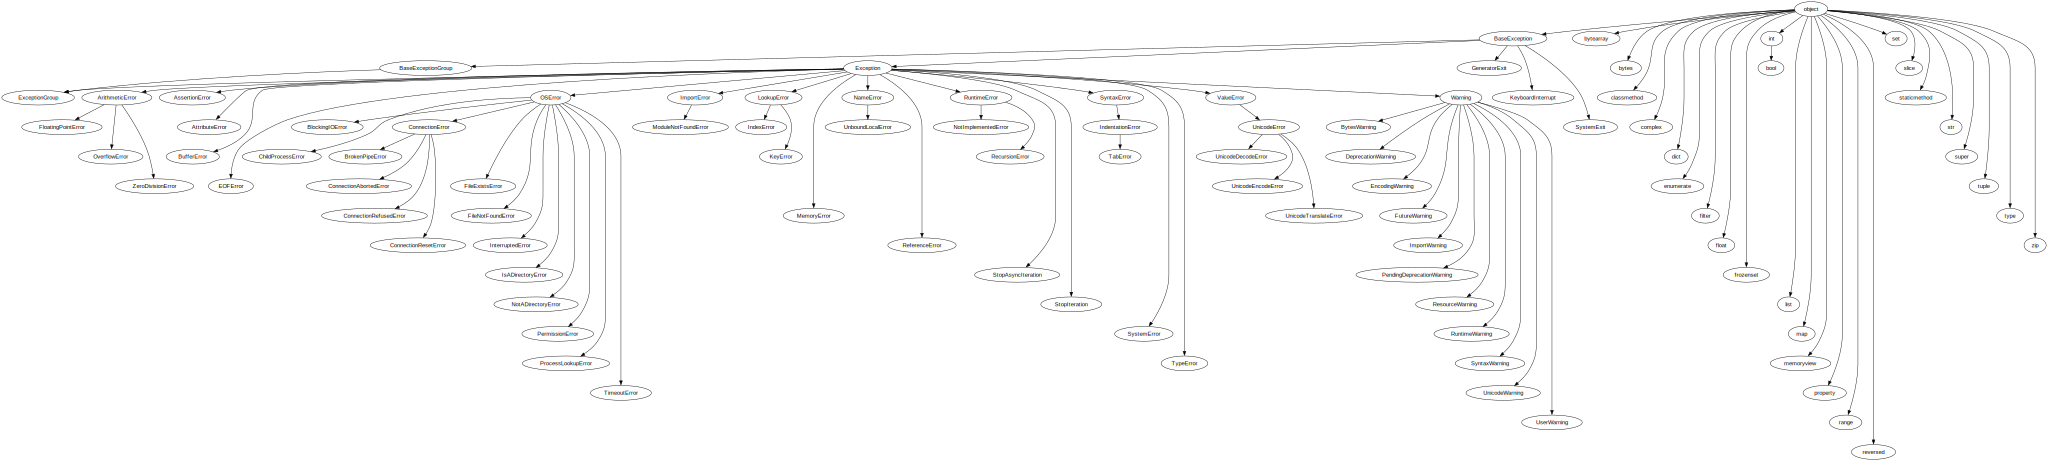

In [11]:
graph.graph_attr['size'] = '30'
display_with_link(graph.unflatten(stagger=15))